In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
keras.__version__

2.3.1


'2.4.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

Each pixel intensity is represented as a byte (0 to 255):

Let's split the full training set into a validation set and a (smaller) training set. 

We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.0

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
X_valid.shape , X_train.shape 

((5000, 28, 28), (55000, 28, 28))

In [6]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

: The labels are the class IDs (represented as uint8), from 0 to 9

Here are the corresponding class names:

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [8]:
y_train[0]

4

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.17254902
  0.49803922 0.71372549 0.7254902  0.63137255 0.47058824 0.21568627
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.16470588 0.77647059 0.98431373
  1.         0.98431373 0.97647059 0.96862745 1.         0.98823529
  0.83921569 0.39215686 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.         0.         0.91372549 0

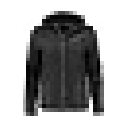

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

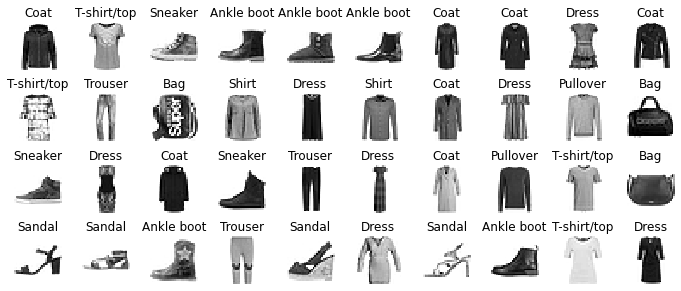

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
28*28

784

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
# ======= Or ==================================================================
#model = keras.models.Sequential(
#        [keras.layers.Flatten(input_shape=[28, 28]),
#         keras.layers.Dense(300, activation="relu"),
#         keras.layers.Dense(100, activation="relu"),
#         keras.layers.Dense(10, activation="softmax")]
#        )

In [15]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
hidden1 = model.layers[1]

In [22]:
#weights = hidden1.get_weights()
weights,biases = hidden1.get_weights()

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ======= Or ==================================================================
# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(),
#               metrics=[keras.metrics.sparse_categorical_accuracy])

In [26]:
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7237 - accuracy: 0.7641 - val_loss: 0.5254 - val_accuracy: 0.8204
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4876 - accuracy: 0.8300 - val_loss: 0.4322 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4405 - accuracy: 0.8455 - val_loss: 0.4180 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4145 - accuracy: 0.8545 - val_loss: 0.3948 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3934 - accuracy: 0.8602 - val_loss: 0.3904 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3771 - accuracy: 0.8672 - val_loss: 0.3713 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3635 - accuracy: 0.8701 - val_loss: 0.3748 - val_accuracy:

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
history.history

{'loss': [0.7237057685852051,
  0.4876399040222168,
  0.44053202867507935,
  0.4145261347293854,
  0.3934394121170044,
  0.3771262764930725,
  0.36351630091667175,
  0.3510444462299347,
  0.34133151173591614,
  0.33208489418029785,
  0.323347806930542,
  0.3157375454902649,
  0.3093959093093872,
  0.30186381936073303,
  0.29549771547317505,
  0.28916165232658386,
  0.28416678309440613,
  0.2779587209224701,
  0.27334123849868774,
  0.2682657241821289,
  0.2625693082809448,
  0.2583414614200592,
  0.2539505660533905,
  0.24971015751361847,
  0.24431312084197998,
  0.2410941869020462,
  0.23572038114070892,
  0.23314781486988068,
  0.22876423597335815,
  0.22482822835445404],
 'accuracy': [0.7640727162361145,
  0.8299999833106995,
  0.8454727530479431,
  0.8544727563858032,
  0.8602363467216492,
  0.8672000169754028,
  0.870090901851654,
  0.8756363391876221,
  0.87867271900177,
  0.8812181949615479,
  0.8838545680046082,
  0.8866181969642639,
  0.8887636661529541,
  0.8918727040290833,


In [29]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.723706,0.764073,0.525398,0.8204
1,0.487640,0.830000,0.432197,0.8540
2,0.440532,0.845473,0.418031,0.8576
3,0.414526,0.854473,0.394792,0.8620
4,0.393439,0.860236,0.390415,0.8688
5,0.377126,0.867200,0.371273,0.8714
6,0.363516,0.870091,0.374829,0.8688
7,0.351044,0.875636,0.351376,0.8772
8,0.341332,0.878673,0.343882,0.8782
9,0.332085,0.881218,0.359581,0.8732


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<AxesSubplot:>

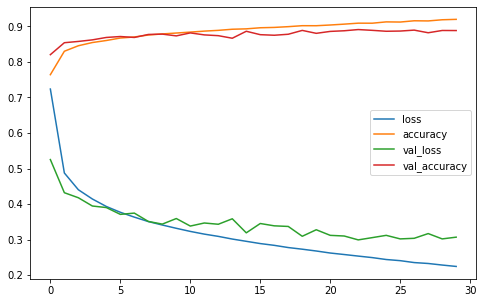

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 62.7459 - accuracy: 0.8500


[62.74587631225586, 0.8500000238418579]

***

In [53]:
X_new = X_test[:3]

In [54]:
y_proba = model.predict(X_new)

In [55]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [57]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [58]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [59]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

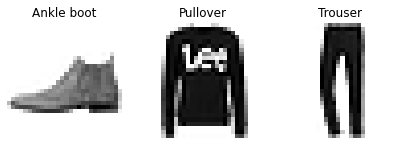

In [60]:
plt.figure(figsize=(7, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.show()